In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset without Target Variables
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28*28*1))
x_test = x_test.reshape((len(x_test), 28*28*1))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
# Create Noisy Data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape,x_test_noisy.shape )

(60000, 28, 28, 1) (10000, 28, 28, 1)


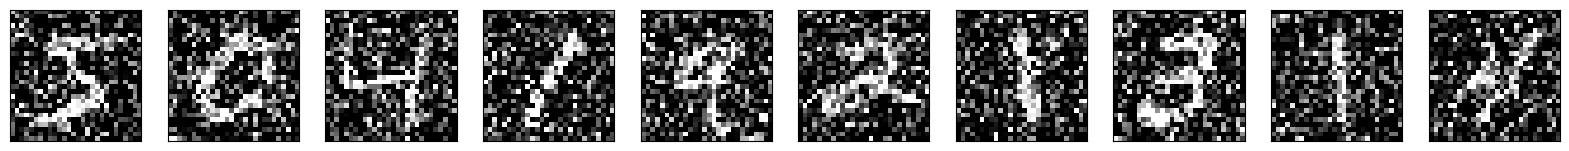

In [6]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [7]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras.models import Model

In [8]:
input_layer_cnv = Input(shape = (28,28,1))
ae_cnv_en = Conv2D (32, (3,3), activation = "relu", padding = "same", kernel_initializer="he_normal")(input_layer_cnv)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D (32, (3,3), activation = "relu", padding = "same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D (4, (3,3), activation = "relu", padding = "same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Flatten(name = "bot")(ae_cnv_en)

ae_cnv_de = Reshape((4,4,4), input_shape= (64,), name= "botnext0")(ae_cnv_en)

ae_cnv_de = Conv2D (4, (3,3), activation = "relu", padding = "same",name= "botnext1")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2),name= "botnext2")(ae_cnv_de)

ae_cnv_de = Conv2D (32, (3,3), activation = "relu", padding = "same", name= "botnext3")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2), name= "botnext4")(ae_cnv_de)

ae_cnv_de = Conv2D (32, (3,3), activation = "relu", padding = "valid",name= "botnext5")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2), name= "botnext6")(ae_cnv_de)

ae_cnv_de = Conv2D (1, (3,3), activation = "sigmoid", padding = "same",name = "botnext7")(ae_cnv_de)
Ae_Conv_denoise = Model (inputs = input_layer_cnv, outputs = ae_cnv_de)

#Ae_Conv.compile(optimizer=tf.keras.optimizers.SGD(0.09,clipvalue=2.5), loss='binary_crossentropy', metrics = ["accuracy"])

Ae_Conv_denoise.compile(optimizer=tf.keras.optimizers.Adadelta(0.1,clipvalue=2), loss='binary_crossentropy', metrics = ["accuracy"])
Ae_Conv_denoise.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 4)           1156  

In [9]:
from time import time
tic = time()
Ae_Conv_denoise.fit(x_train_noisy, x_train,
                epochs=100,
                verbose=2,
                batch_size=256,
                shuffle=False, validation_split = 0.1)
                #validation_data=(x_test, x_test))
toc = time()
print("Training Took {} Secs".format(toc-tic))

Epoch 1/100
211/211 - 17s - loss: 0.3256 - accuracy: 0.7960 - val_loss: 0.2555 - val_accuracy: 0.7963 - 17s/epoch - 82ms/step
Epoch 2/100
211/211 - 2s - loss: 0.2450 - accuracy: 0.7924 - val_loss: 0.2326 - val_accuracy: 0.7939 - 2s/epoch - 9ms/step
Epoch 3/100
211/211 - 2s - loss: 0.2268 - accuracy: 0.7918 - val_loss: 0.2216 - val_accuracy: 0.7945 - 2s/epoch - 9ms/step
Epoch 4/100
211/211 - 2s - loss: 0.2177 - accuracy: 0.7921 - val_loss: 0.2147 - val_accuracy: 0.7943 - 2s/epoch - 9ms/step
Epoch 5/100
211/211 - 2s - loss: 0.2119 - accuracy: 0.7925 - val_loss: 0.2097 - val_accuracy: 0.7945 - 2s/epoch - 9ms/step
Epoch 6/100
211/211 - 2s - loss: 0.2076 - accuracy: 0.7929 - val_loss: 0.2058 - val_accuracy: 0.7951 - 2s/epoch - 10ms/step
Epoch 7/100
211/211 - 2s - loss: 0.2040 - accuracy: 0.7934 - val_loss: 0.2023 - val_accuracy: 0.7956 - 2s/epoch - 9ms/step
Epoch 8/100
211/211 - 2s - loss: 0.2008 - accuracy: 0.7940 - val_loss: 0.1994 - val_accuracy: 0.7961 - 2s/epoch - 9ms/step
Epoch 9/100


313/313 [==============================] - 1s 3ms/step
Recreated image Representation of Shape (10000, 28, 28, 1) using Decoder and reduced Image representation of shape (10000, 28, 28, 1)


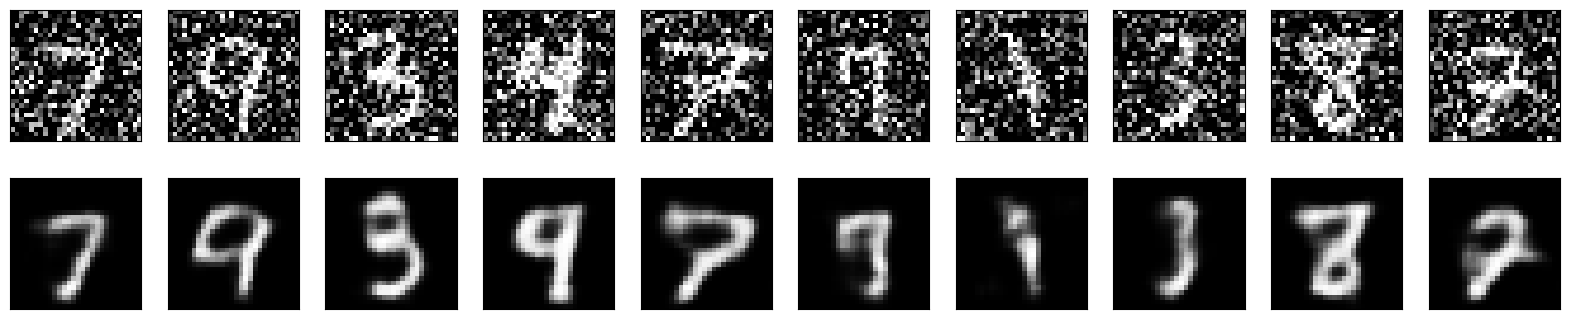

In [10]:
dns_decoded_image = Ae_Conv_denoise.predict(x_test_noisy)
print("Recreated image Representation of Shape {} using Decoder and reduced Image representation of shape {}".format (dns_decoded_image.shape,
                                                                                                                      dns_decoded_image.shape))
n = 10  # how many digits we will display
k =16
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(dns_decoded_image[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()